## Basic approach

Aqui, implementaremos modelos baseados em regras para reconhecer os acordes. Os modelos encontram-se mais profundamente explicados no livro $\textit{Fundamentals of Music Processing Audio}$.

In [16]:
import os
import pandas as pd
import IPython.display as ipd
# import librosa
# import librosa.display
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob
import json

In [2]:
semitons = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [3]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']
# notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
notes

['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']

#### Nomes dos acordes

In [38]:
acordes_7 = [note + '7' for note in notes]
acordes_dim = [note + 'dim' for note in notes]
acordes_maj7 = [note + 'maj7' for note in notes]
acordes_meio_dim = [note + 'meio_dim' for note in notes]
acordes_min7 = [note + 'min7' for note in notes]

#### Definindo os chromas "perfeitos" de cada acorde

Acordes <font color ='red'> maiores </font> com sétima <font color ='red'> maior </font> (maj7)

In [39]:
dict_maj7 = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 4
    quinta = fundamental + 7
    setima = fundamental + 11

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    
    a = acorde_chroma.tolist()
    

    chord = acordes_maj7[i]
    dict_maj7[chord] = a

In [40]:
dict_maj7

{'Cmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Dbmaj7': [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'Dmaj7': [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Ebmaj7': [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Emaj7': [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Fmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Gbmaj7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'Gmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Abmaj7': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
 'Amaj7': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 'Bbmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0],
 'Bmaj7': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]}

Acordes <font color ='red'> maiores </font> com sétima <font color ='blue'> menor </font> (7)

In [41]:
dict_7 = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 4
    quinta = fundamental + 7
    setima = fundamental + 10

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    
    a = acorde_chroma.tolist()
    

    chord = acordes_7[i]
    dict_7[chord] = a

In [42]:
dict_7

{'C7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Db7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'D7': [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Eb7': [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'E7': [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'F7': [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Gb7': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'G7': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Ab7': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'A7': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
 'Bb7': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 'B7': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]}

Acordes <font color ='blue'> menores </font> com sétima <font color ='blue'> menor </font> (min7)

In [43]:
dict_min7 = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 7
    setima = fundamental + 10

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    
    a = acorde_chroma.tolist()
    

    chord = acordes_min7[i]
    dict_min7[chord] = a

In [44]:
dict_min7

{'Cmin7': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Dbmin7': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Dmin7': [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Ebmin7': [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'Emin7': [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Fmin7': [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'Gbmin7': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Gmin7': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Abmin7': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Amin7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
 'Bbmin7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 'Bmin7': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]}

Acordes <font color ='green'> diminutos </font>

In [45]:
dict_dim = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 6
    setima = fundamental + 9

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    
    a = acorde_chroma.tolist()
    

    chord = acordes_dim[i]
    dict_dim[chord] = a

In [46]:
dict_dim

{'Cdim': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Dbdim': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Ddim': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Ebdim': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Edim': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Fdim': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Gbdim': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Gdim': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Abdim': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Adim': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Bbdim': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Bdim': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]}

Acordes <font color ='green'> meio diminutos </font>

In [47]:
dict_meio_dim = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 6
    setima = fundamental + 10

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    
    
    a = acorde_chroma.tolist()
    
    chord = acordes_meio_dim[i]
    dict_meio_dim[chord] = a

In [48]:
dict_meio_dim#['Cmeio_dim'].tolist()

{'Cmeio_dim': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'Dbmeio_dim': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Dmeio_dim': [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'Ebmeio_dim': [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Emeio_dim': [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Fmeio_dim': [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Gbmeio_dim': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Gmeio_dim': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Abmeio_dim': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Ameio_dim': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
 'Bbmeio_dim': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 'Bmeio_dim': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]}

In [50]:
dict_chords = {**dict_maj7, **dict_7, **dict_min7, **dict_dim, **dict_meio_dim}
dict_chords

{'Cmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Dbmaj7': [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'Dmaj7': [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Ebmaj7': [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Emaj7': [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Fmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Gbmaj7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'Gmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Abmaj7': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
 'Amaj7': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 'Bbmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0],
 'Bmaj7': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 'C7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Db7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0

Salvando este dicionário para facilitar minha vida no futuro:

In [51]:
# import json
with open('perfect_chromas.json', 'w') as fp:
    json.dump(dict_chords, fp)

### Carregando os audios para gerar os chromas:

Teste:

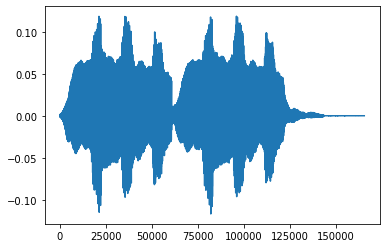

In [65]:
file = '../corpus/generated_chords/audio/dim/Flute/Bdim_outside_now_Flute.ogg'
y, sr = librosa.load(file)

plt.plot(y)

In [66]:
N = len(y)
chroma = librosa.feature.chroma_stft(y=y, 
                                        sr=sr, 
                                        tuning=0.0, 
                                        norm=0, 
                                        hop_length=N+1, 
                                        n_fft=N
                                    )

In [67]:
chroma.shape

(12, 1)

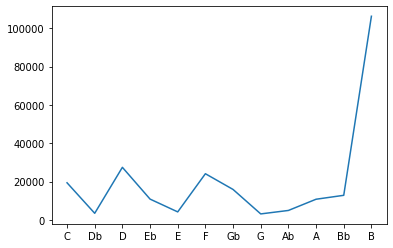

<Figure size 432x288 with 0 Axes>

In [68]:
plt.plot(notes,
          chroma);

# plt.title(chord);
plt.show()
plt.clf()

In [83]:
file.split('/')[-1].split('_')[0]

'Bdim'

In [69]:
dists = {}
for key, value in dict_chords.items():
    chroma_norm = chroma.T/chroma.max()
    dist = np.linalg.norm(value - chroma_norm)
    print('Acorde:', key, '|', 'Distância:', dist)
    dists[key] = dist
    print('--------------------------------')

Acorde: Cmaj7 | Distância: 1.6469446172542885
--------------------------------
Acorde: Dbmaj7 | Distância: 2.058727575656039
--------------------------------
Acorde: Dmaj7 | Distância: 2.032456436613619
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0477252441022347
--------------------------------
Acorde: Emaj7 | Distância: 1.6847741717428013
--------------------------------
Acorde: Fmaj7 | Distância: 2.0284335571789796
--------------------------------
Acorde: Gbmaj7 | Distância: 2.038434963200835
--------------------------------
Acorde: Gmaj7 | Distância: 1.5297830495842848
--------------------------------
Acorde: Abmaj7 | Distância: 2.119825695248948
--------------------------------
Acorde: Amaj7 | Distância: 2.1851042254090465
--------------------------------
Acorde: Bbmaj7 | Distância: 1.9493160556084073
--------------------------------
Acorde: Bmaj7 | Distância: 1.5714590844851364
--------------------------------
Acorde: C7 | Distância: 2.114427618561976
---------

In [86]:
pred = min(dists, key=dists.get)

In [77]:
pd.DataFrame(data=dists.values(), index=dists.keys()).sort_values(0, ascending=True)

,0
Bmeio_dim,1.428795
Bdim,1.466851
Abdim,1.466851
Fdim,1.466851
Ddim,1.466851
G7,1.478402
Bmin7,1.481897
Abmeio_dim,1.518623
Gmaj7,1.529783
Fmeio_dim,1.569572


In [85]:
df_teste = pd.DataFrame()

In [87]:
df_teste.at[0, 'true'] = file.split('/')[-1].split('_')[0]
df_teste.at[0, 'pred'] = pred

In [88]:
df_teste

,true,pred
0,Bdim,Bmeio_dim


In [61]:
os.listdir(corpus_folder)[-1:]

['maj7']

In [90]:
file_teste = '../corpus/generated_chords/audio/dim/Oboe/Abdim_agogo-samba_Oboe.ogg'
file_teste.split('/')[-1].split('_')[0]

'Abdim'

In [79]:
corpus_folder = '../corpus/generated_chords/audio'
files = []

df_model = pd.DataFrame()

# entrando na pasta de cada chord type 
# gerando primeiro pra um chord type apenas, pq demora muito e to curiosa pra ver logo algum resultado pelo menos
for folder in os.listdir(corpus_folder):
      
    instr_folders = [x[0] for x in os.walk(corpus_folder +'/' +folder)][1:]
    
                     
    # entrando na pasta de cada instrumento
    for instr_folder in instr_folders:
        
        # obtendo o caminho para cada arquivo de audio
        for audio_file in glob.glob(instr_folder+'/*.ogg'):

            # obtendo o nome do arquivo
            file_name = audio_file.split('/')[-1]
            
            # carregando o audio com o librosa
            y, sr = librosa.load(audio_file)
            
            
            # calculando o chroma para cada audio
            N = len(y)
            chroma = librosa.feature.chroma_stft(y=y, 
                                                    sr=sr, 
                                                    tuning=0.0, 
                                                    norm=0, 
                                                    hop_length=N+1, 
                                                    n_fft=N
                                                )
            
            # criando um dicionário com as distâncias do acorde real para cada chroma perfeito
            dists = {}
            for key, value in dict_chords.items():
                chroma_norm = chroma.T/chroma.max()
                dist = np.linalg.norm(value - chroma_norm)
#                 print('Acorde:', key, '|', 'Distância:', dist)
                dists[key] = dist
            
            # retornando como output o chroma perfeito com menor distância
            pred = min(dists, key=dists.get)
            
            df_model.at[file_name, 'true'] = audio_file.split('/')[-1].split('_')[0]
            df_model.at[file_name, 'pred'] = pred


In [84]:
def fix_meio_dim(chord):
    if 'meio' in chord:
        return chord + '_dim'
    else:
        return chord
    
df_model['true_fixed'] = df_model['true'].map(fix_meio_dim)

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
import itertools

In [85]:
print(classification_report(df_model['true_fixed'], df_model['pred']))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          A7       0.40      0.44      0.42       357
         Ab7       0.56      0.51      0.54       357
       Abdim       0.00      0.00      0.00       357
      Abmaj7       0.50      0.88      0.64       357
  Abmeio_dim       0.52      0.40      0.45       357
      Abmin7       0.61      0.60      0.61       357
        Adim       0.00      0.00      0.00       357
       Amaj7       0.42      0.85      0.56       357
   Ameio_dim       0.56      0.40      0.47       357
       Amin7       0.58      0.50      0.54       357
          B7       0.56      0.32      0.41       357
         Bb7       0.52      0.33      0.41       357
       Bbdim       0.00      0.00      0.00       357
      Bbmaj7       0.36      0.91      0.51       357
  Bbmeio_dim       0.57      0.34      0.43       357
      Bbmin7       0.51      0.59      0.55       357
        Bdim       0.00      0.00      0.00       357
       Bmaj7       0.31    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

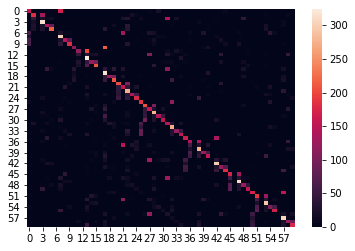

In [93]:
sns.heatmap(confusion_matrix(df_model['true_fixed'], df_model['pred']))

In [100]:
classes = df_model['true'].unique()
classes.sort()
classes

array(['A7', 'Ab7', 'Abdim', 'Abmaj7', 'Abmeio', 'Abmin7', 'Adim',
       'Amaj7', 'Ameio', 'Amin7', 'B7', 'Bb7', 'Bbdim', 'Bbmaj7',
       'Bbmeio', 'Bbmin7', 'Bdim', 'Bmaj7', 'Bmeio', 'Bmin7', 'C7',
       'Cdim', 'Cmaj7', 'Cmeio', 'Cmin7', 'D7', 'Db7', 'Dbdim', 'Dbmaj7',
       'Dbmeio', 'Dbmin7', 'Ddim', 'Dmaj7', 'Dmeio', 'Dmin7', 'E7', 'Eb7',
       'Ebdim', 'Ebmaj7', 'Ebmeio', 'Ebmin7', 'Edim', 'Emaj7', 'Emeio',
       'Emin7', 'F7', 'Fdim', 'Fmaj7', 'Fmeio', 'Fmin7', 'G7', 'Gb7',
       'Gbdim', 'Gbmaj7', 'Gbmeio', 'Gbmin7', 'Gdim', 'Gmaj7', 'Gmeio',
       'Gmin7'], dtype=object)

In [103]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15,13))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center"#,
#                  color="white" if cm[i, j] > thresh else "black"
                )

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def clf_eval(clf, X, y_true, classes=['7', 'min7']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
#     print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
#     print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
#     print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)

Confusion matrix, without normalization
[[156   0   0 ...   0   0   0]
 [  0 182   0 ...   0   9   0]
 [  0  44   0 ...   0   0   0]
 ...
 [  0   0   0 ... 306   0   0]
 [  0   0   0 ...  22 122  88]
 [  0   0   0 ...  23   0 175]]


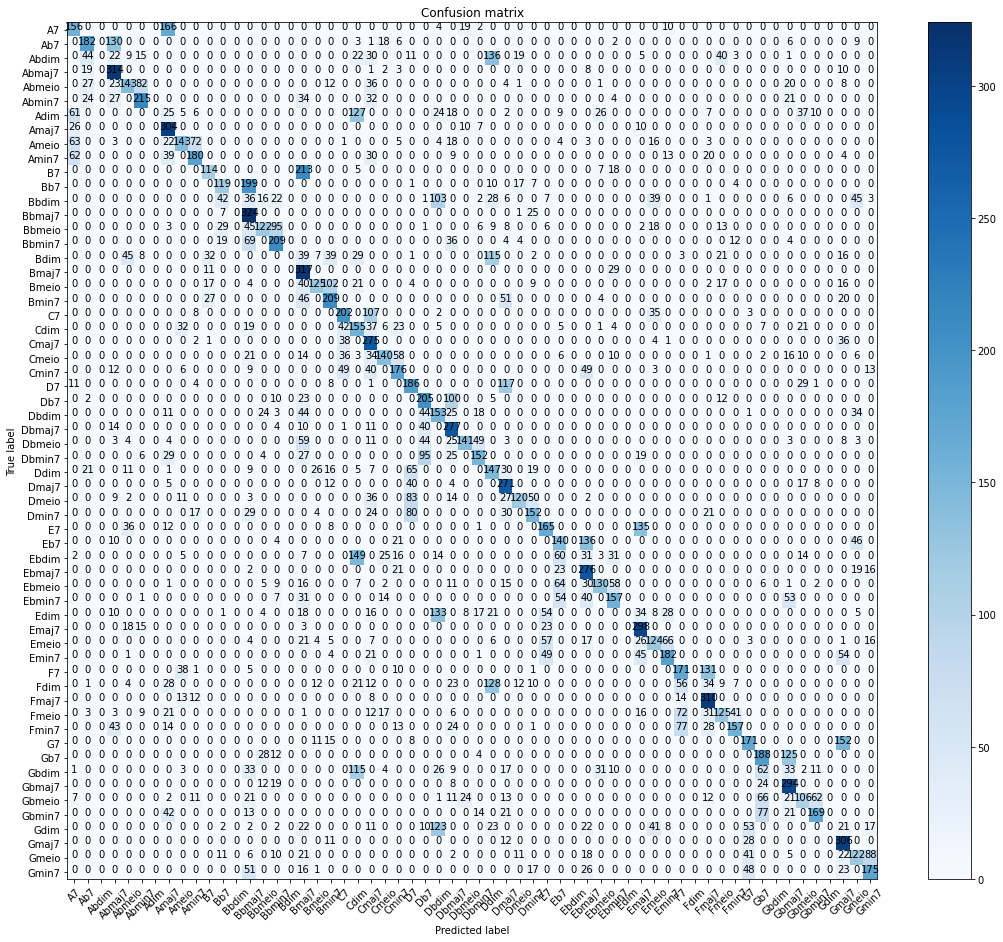

In [104]:
plot_confusion_matrix(confusion_matrix(df_model['true_fixed'], df_model['pred']), classes=classes)

In [105]:
dims1 = ['C', 'Eb', 'Gb', 'A']
dims2 = ['Db', 'E', 'G', 'Bb']
dims3 = ['D', 'F', 'Ab', 'B']

Aqui vamos tratar a questão dos diminutos. Como sabemos, existem apenas 3 acordes diminutos diferentes acusticamente. Portanto, se um acorde real for Cdim e o modelo retornar Ebdim, isso não pode ser tratado como erro, pois estes dois acordes possuem exatamente as mesmas notas.

In [76]:
df_model['true'].unique()

array(['Gbmaj7', 'Dmaj7', 'Bmaj7', 'Gmaj7', 'Amaj7', 'Ebmaj7', 'Abmaj7',
       'Cmaj7', 'Dbmaj7', 'Fmaj7', 'Bbmaj7', 'Emaj7'], dtype=object)

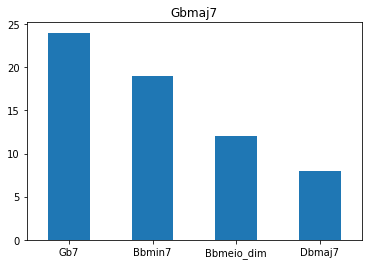

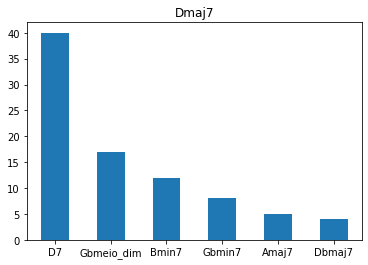

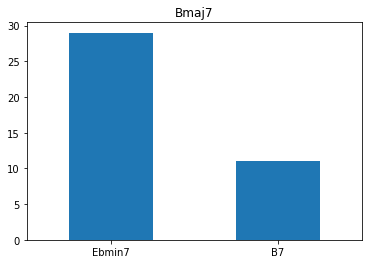

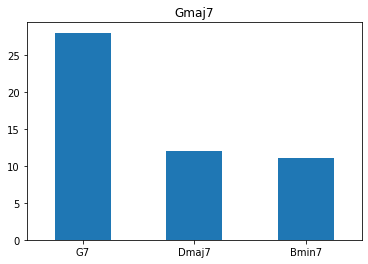

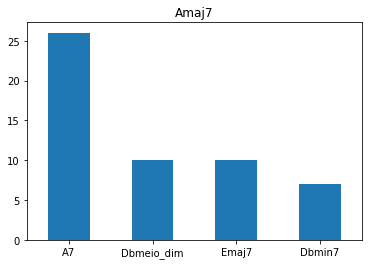

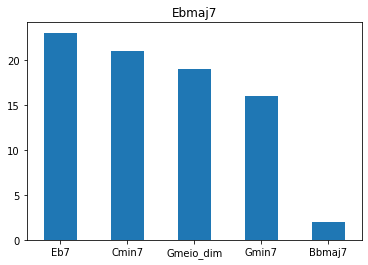

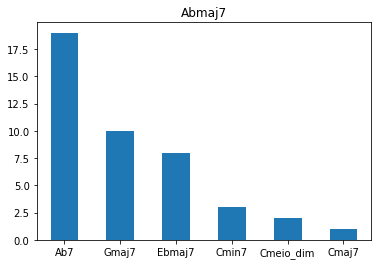

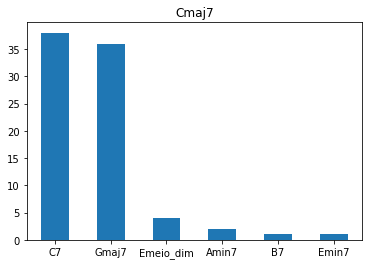

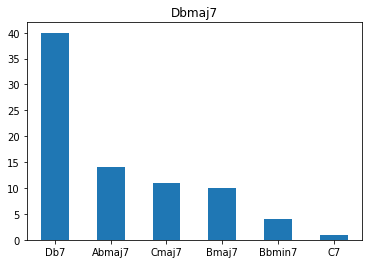

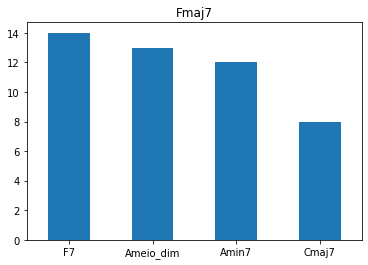

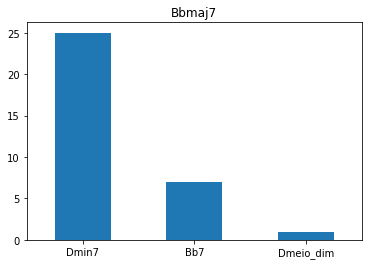

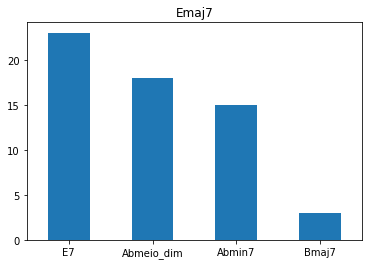

In [78]:
for chord in df_model['true'].unique():

    df_chord = df_model[(df_model.true == chord) & (df_model.pred != chord)]['pred'].value_counts()
    df_chord.plot(kind='bar')
    plt.title(chord);
    plt.xticks(rotation=0);
    plt.show()